In [1]:
##Uncomment this cell and run is once below
# !python3.8 -m pip install virtualenv
# !mkdir raw_data encoder scaler trained_model
# !python3.8 -m virtualenv venv
# !source/venv/bin/activate
# !pip install -r requirements.txt
#!pip install -r requirement.txt

https://drive.google.com/drive/folders/11FXqc7FYXmGo9Mi46NtBmXm6zai53_jn

# Go to above link and download all the file and put them into raw_data folder 

# Importing local .py file in notebook

In [2]:
#!python3 dashboard/__init__.py
%load_ext autoreload
%autoreload 2

# Importing the module

In [4]:
import yaml
import pandas as pd
import numpy as np 
import seaborn as sns

In [113]:
from sklearn.linear_model import LogisticRegression
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [112]:
##This packages are written by own in .py file inside dashboard
from dashboard import change_label
from dashboard.modeling import standardization, encode_dataframe
from dashboard import Visualization
from dashboard import DataInformation
from dashboard import show_result

# Reading config.yaml file 

In [119]:
with open("config.yaml", "r") as stream:
    cl = yaml.safe_load(stream)

In [120]:
train = cl['train']
feature = cl['feature']
test = cl['test']
test21 = cl['test21']
model_path = cl['model_path']
encoder_path = cl['encoder_path']
scaler_path = cl['scaler_path']

In [8]:
train

'./raw_data/KDDTrain+.txt'

# Reading Dataset using pandas 

Have you ever wondered how your computer/network is able to avoid being infected with malware and bad traffic inputs from the internet? The reason why it can detect it so well is because there are systems in place to protect your valuable information held in your computer or networks. These systems that detect malicious traffic inputs are called Intrusion Detection Systems (IDS) and are trained on internet traffic record data. The most common data set is the NSL-KDD, and is the benchmark for modern-day internet traffic.

This data set is comprised of four sub data sets: KDDTest+, KDDTest-21, KDDTrain+, KDDTrain+_20Percent, although KDDTest-21 and KDDTrain+_20Percent are subsets of the KDDTrain+ and KDDTest+. From now on, KDDTrain+ will be referred to as train and KDDTest+ will be referred to as test. The KDDTest-21 is a subset of test, without the most difficult traffic records (Score of 21), and the KDDTrain+_20Percent is a subset of train, whose record count makes up 20% of the entire train dataset. That being said, the traffic records that exist in the KDDTest-21 and KDDTrain+_20Percent are already in test and train respectively and aren’t new records held out of either dataset.

These data sets contain the records of the internet traffic seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains 43 features per record, with 41 of the features referring to the traffic input itself and the last two are labels (whether it is a normal or attack) and Score (the severity of the traffic input itself).

In [9]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
test_21 = pd.read_csv(test21, names= feature)

In [10]:
test_data=pd.read_csv(test,names=feature)

In [11]:
train_info = DataInformation(train_data) ## Creating the object of datainformation class

In [12]:
train_info.get_dataset_head() ## looks of first 12 rows of data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [13]:
train_info.get_info() ## information of all column in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [14]:
train_info.check_data_imbalance() ## count of each label of dataset

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [15]:
## Drop the difficulty  colum 

In [16]:
train_data = train_info.drop_column("difficulty")

# Data Analysis 

In [19]:
train_viz = Visualization

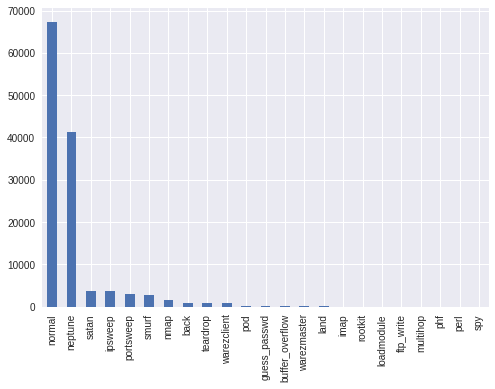

In [20]:
train_viz.bar_graph(train_data, "label")

Within the data set exists 4 different classes of attacks:

Denial of Service (DoS)
Probe
User to Root(U2R)
Remote to Local (R2L)

DoS is an attack that tries to shut down traffic flow to and from the target system. The IDS is flooded with an abnormal amount of traffic, which the system can’t handle, and shuts down to protect itself. This prevents normal traffic from visiting a network. An example of this could be an online retailer getting flooded with online orders on a day with a big sale, and because the network can’t handle all the requests, it will shut down preventing paying customers to purchase anything. This is the most common attack in the data set.

Probe or surveillance is an attack that tries to get information from a network. The goal here is to act like a thief and steal important information, whether it be personal information about clients or banking information.

U2R is an attack that starts off with a normal user account and tries to gain access to the system or network, as a super-user (root). The attacker attempts to exploit the vulnerabilities in a system to gain root privileges/access.



R2L is an attack that tries to gain local access to a remote machine. An attacker does not have local access to the system/network, and tries to “hack” their way into the network.

It is noticed from the descriptions above that DoS acts differently from the other three attacks, where DoS attempts to shut down a system to stop traffic flow altogether, whereas the other three attempts to quietly infiltrate the system undetected.

In the table below, a breakdown of the different subclasses of each attack that exists in the data set is shown

![simpleimage](raw_data/detail.png)

In [22]:
final_label_list = ['Dos','R2L','Probe','U2R']

In [23]:
for label in final_label_list:
    change_label(train_data, cl[label], label)

In [24]:
train_info.check_data_imbalance() ## count of each label of dataset

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [25]:
train_data['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

Now there are 4 unique type of attract in label column. 

In [26]:
train_info_lc = DataInformation(train_data)

In [27]:
train_info_lc.check_data_imbalance()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

Data is highly imbalance so accuracy doesnot works to check the metric. we need to explore other materics.

# \> Check How many categorical values are present in the dataset

In [28]:
train_info_lc.get_categorical_data_columns()

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')

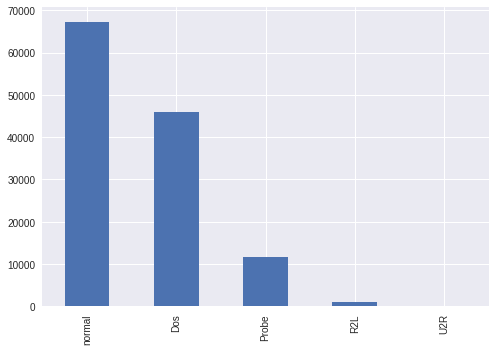

In [29]:
train_viz.bar_graph(train_data, "label")

# Protocol
Attribute No. : 2

Attribute Name. : Protocol_type

Description : Protocol used in the connection


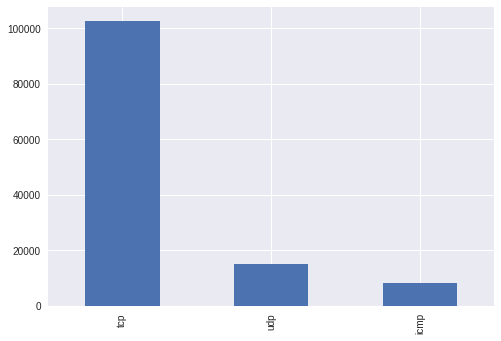

In [30]:
train_viz.bar_graph(train_data,'protocol_type')

In [31]:
train_data.protocol_type.value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

# Flag

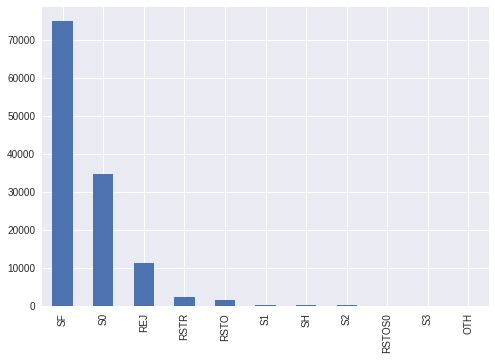

In [32]:
train_viz.bar_graph(train_data,'flag')


# Services
Attribute No. : 3

Attribute Name. : Service

Description : Destination network service used

In [33]:
services_frequency = train_data['service'].value_counts()


# Duration
Attribute No. : 1

Attribute Name. : Duration

Description : Length of time duration of the connection
    Duration is the contineous value so we need to make is discreate so that the error while trainnig will me minimized 
    

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


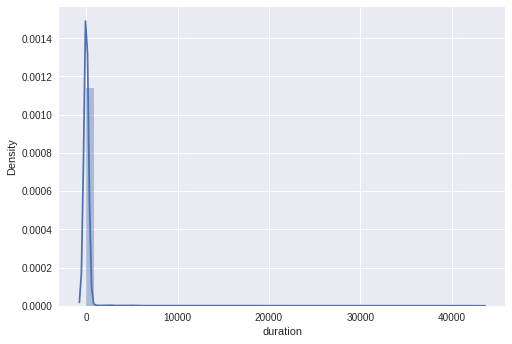

In [34]:

df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [35]:
train_data['duration']

0         0
1         0
2         0
3         0
4         0
         ..
125968    0
125969    8
125970    0
125971    0
125972    0
Name: duration, Length: 125973, dtype: int64

In [36]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"


In [37]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
...,...,...,...
125968,0,"(-0.1, 0.0]",0
125969,8,"(0.0, 10000.0]","(0, 10000]"
125970,0,"(-0.1, 0.0]",0
125971,0,"(-0.1, 0.0]",0


In [38]:
duration_frequency = df['duration_bin'].value_counts()
#subsetServices= list(duration_frequency[:].index)
duration_frequency

0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: duration_bin, dtype: int64

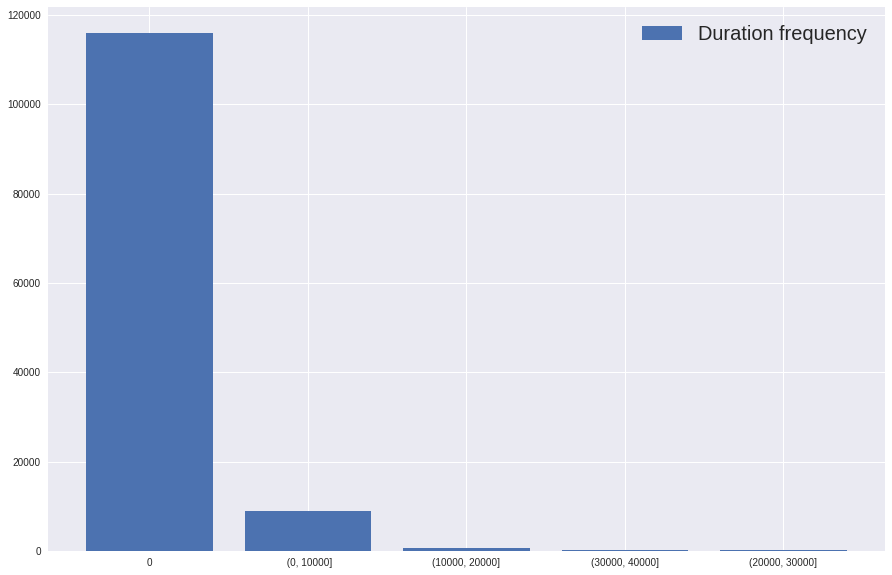

In [39]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

In [40]:
object_type_column = ['protocol_type', 'service', 'flag', 'label']

In [41]:
td_without_categorical = train_data.drop(object_type_column, axis=1)

In [42]:
#train_viz.plot_data_distribution(td_without_categorical)

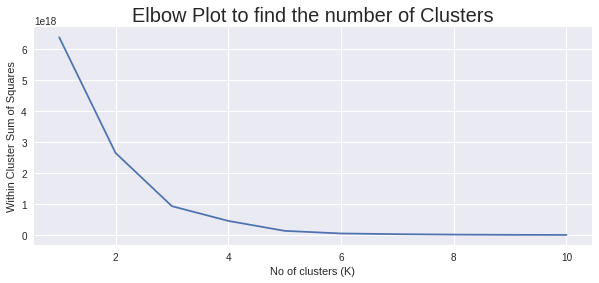

In [43]:
train_viz.plot_elbow_graph(td_without_categorical)

# Data Prepration
For Binary and Multi-class Classification
------

Label encoding with One-Hot
---------

Binary Classification
----------

bin_data_train -> ready dataframe for Modeling
---------
numeric_bin_data -> just numeric features for feature selection
-------

In [44]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))
bin_label

,label
0,normal
1,normal
2,abnormal
3,normal
4,normal
...,...
125968,abnormal
125969,normal
125970,normal
125971,abnormal


In [45]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


In [46]:
# label encoding (0,1) binary labels (abnormal,normal)

le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0


In [47]:
# one-hot-encoding attack label
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
#bin_data['label'] = bin_label
bin_data['intrusion'] = enc_label

bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


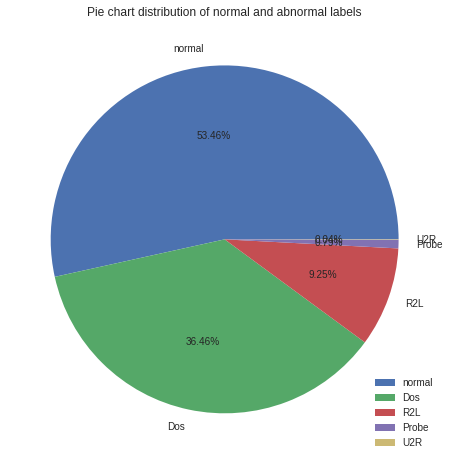

In [48]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [49]:
#bin_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-1]
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# this data set is include just numeric features with multi labels 
#created for feature selection
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

/tmp/ipykernel_4836/80282330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin_data['intrusion'] = bin_data['intrusion']


In [51]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


# Multi-class Classification
multi_data_train -> ready dataframe for Modeling
--
numeric_multi_data -> just numeric features for feature selection
--

In [52]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [53]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [54]:
# one-hot-encoding attack label

multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")  
multi_data['label'] = multi_label
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal,label
0,0,491,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos


In [55]:
# multi_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-5]
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S1,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
# this data set is include just numeric features with multi labels 
#created for feature selection
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data

/tmp/ipykernel_4836/1356758595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi_data['label'] = multi_label


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0


# Feature Selection
we do this because we prefer that train models with significant features and get reliable model to classify test set

In [57]:
#num_dataset_bin is just include numeric features with binary labels
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [58]:
#dataset_bin is include hole features (with encoded non numeric features like services, protocol and flag) with binary labels
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


# Feature Importance
pearson corrolation for binary class dataset
-------
feature extraction from numeric_bin_data
--
pearson_bin_dataset is binary-class dataset based on pearson corrolation between numeric features and binary-class ( Intrusion-> yes(1)/no(0))
--

In [59]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)


count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [60]:
highest_corr_columns= highest_corr.index

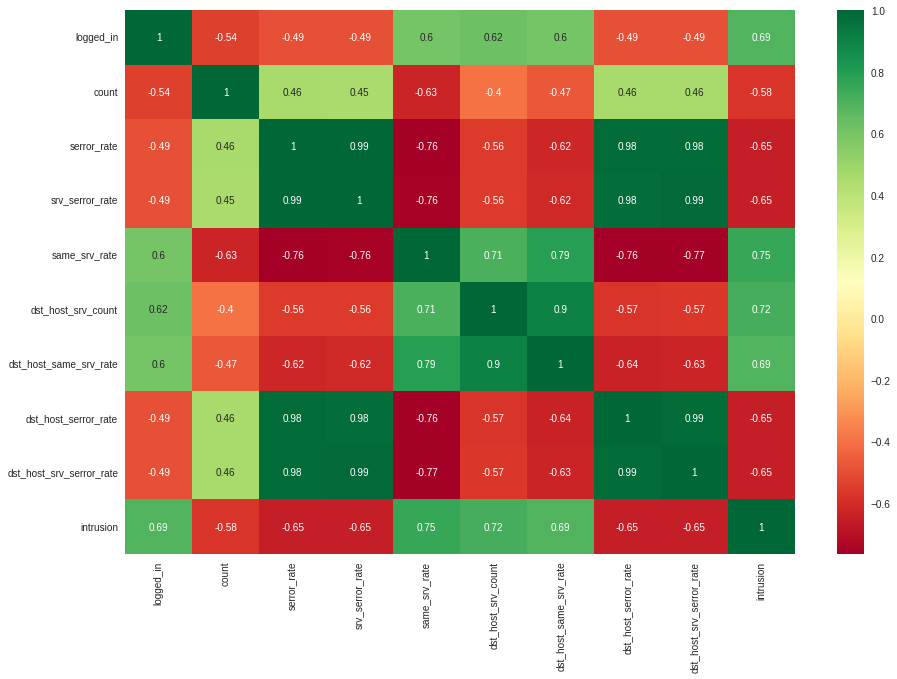

In [61]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [62]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


pearson corrolation for multi-class dataset
feature selection from numeric_multi_data
pearson_multi_dataset is multi-class dataset based on pearson corrolation between numeric features and multi-class ( Types of Attacks)

In [63]:

#feature selection of all features (numeric and categorical features)
chi_scores = chi2(X_train_bin,y_train_bin)
chi_scores

(array([7.08280969e+06, 3.34032490e+09, 1.74609581e+09, 6.51239512e+00,
        3.28272717e+03, 1.81710838e+00, 4.87618999e+02, 2.97369498e+00,
        3.62591460e+04, 2.68943252e+04, 5.17680356e+01, 1.17303524e+02,
        3.25504830e+04, 1.05355586e+03, 1.34709608e+01, 4.09027580e+02,
                   nan, 8.70617585e-01, 1.92525066e+02, 6.52574244e+06,
        1.42326958e+01, 3.73654160e+04, 3.74519039e+04, 6.92353165e+03,
        6.99752801e+03, 2.08265018e+04, 2.69428137e+03, 1.24533866e+03,
        9.57432784e+05, 6.96870490e+06, 2.34477802e+04, 3.19789138e+03,
        6.92743399e+02, 1.90567199e+02, 3.72260458e+04, 3.85444066e+04,
        6.35482480e+03, 6.86709925e+03, 4.72870818e+03, 6.57169092e+01,
        5.23482354e+03, 1.59085746e+02, 4.30897575e+01, 9.90101757e+02,
        2.29721985e+00, 3.17181626e+02, 8.15513048e+02, 8.43079686e+02,
        6.25992410e+02, 6.46667389e+02, 5.98425772e+02, 6.17952141e+02,
        5.00464631e+02, 7.83935970e+03, 4.98496708e+02, 3.348288

In [64]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)

p_values.sort_values(ascending = False , inplace = True)

In [65]:
#select 20 best features
p_values = p_values[:20]

<AxesSubplot:>

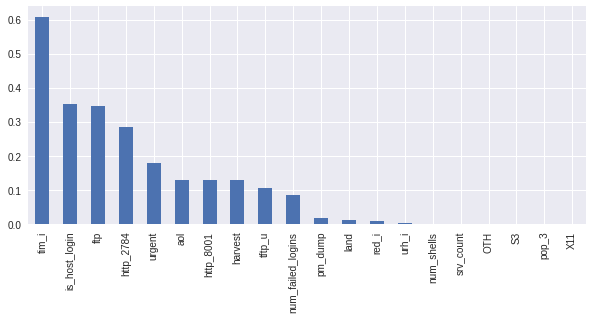

In [66]:
p_values.plot.bar()

In [67]:
#feature selection of numeric features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_num_bin,y_train_num_bin)


In [68]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

In [69]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,duration,7.082810e+06
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
3,land,6.512395e+00
4,wrong_fragment,3.282727e+03
5,urgent,1.817108e+00
6,hot,4.876190e+02
7,num_failed_logins,2.973695e+00
8,logged_in,3.625915e+04
9,num_compromised,2.689433e+04


In [70]:
data_chi2_10best = pd.DataFrame(featureScores.nlargest(10,'Score'))  #print 10 best features
data_chi2_10best

,Specs,Score
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
0,duration,7.082810e+06
29,dst_host_srv_count,6.968705e+06
19,count,6.525742e+06
28,dst_host_count,9.574328e+05
35,dst_host_srv_serror_rate,3.854441e+04
22,srv_serror_rate,3.745190e+04
21,serror_rate,3.736542e+04
34,dst_host_serror_rate,3.722605e+04


In [71]:
data_chi2_10best = list(data_chi2_10best['Specs'])

In [72]:
Chi2_dataset = X_train_num_bin[data_chi2_10best]
Chi2_dataset

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate
0,491,0,0,25,2,150,0.00,0.0,0.0,0.00
1,146,0,0,1,13,255,0.00,0.0,0.0,0.00
2,0,0,0,26,123,255,1.00,1.0,1.0,1.00
3,232,8153,0,255,5,30,0.01,0.2,0.2,0.03
4,199,420,0,255,30,255,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,25,184,255,1.00,1.0,1.0,1.00
125969,105,145,8,244,2,255,0.00,0.0,0.0,0.00
125970,2231,384,0,30,1,255,0.00,0.0,0.0,0.72
125971,0,0,0,8,144,255,1.00,1.0,1.0,1.00


/home/bhupin/akash_vai/dashboard/modeling.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,precision,recall,f1-score,support
Dos,1.0,1.0,1.0,11414.0
Probe,1.0,1.0,1.0,2967.0
R2L,1.0,1.0,1.0,272.0
U2R,1.0,1.0,1.0,15.0
normal,1.0,1.0,1.0,16826.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,31494.0
weighted avg,1.0,1.0,1.0,31494.0


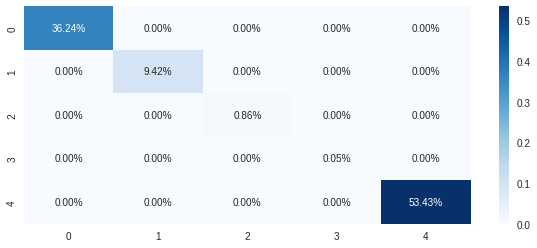

In [147]:
#Tree base classifier 
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()

show_result(multi_data_train, multi_label, clf, model_path)

In [74]:
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


# xgboost

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

[23:00:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,precision,recall,f1-score,support
Dos,1.0,1.0,1.0,11414.0
Probe,1.0,1.0,1.0,2967.0
R2L,1.0,1.0,1.0,272.0
U2R,1.0,1.0,1.0,15.0
normal,1.0,1.0,1.0,16826.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,31494.0
weighted avg,1.0,1.0,1.0,31494.0


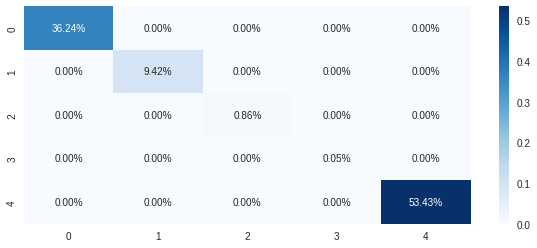

In [75]:

clf = xgboost.XGBClassifier()
show_result(multi_data_train, multi_label, clf, model_path)

# Data Standardization
Formula = z = x -mean / standard deviation
Scaling vs. Normalization: What's the difference? The difference is that, in scaling, you're changing the range of your data. When you standardize a normal distribution, the mean becomes 0 and the standard deviation becomes 1. This allows you to easily calculate the probability of certain values occurring in your distribution, or to compare data sets with different means and standard deviations... while in normalization you're changing the shape of the distribution of your data.

Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression and linear discriminant analysis

Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks. Standardization assumes that your data has a Gaussian (bell curve) distribution






In [76]:
numeric_col = train_data.drop(train_info_lc.get_categorical_data_columns(), axis = 1).columns

In [78]:
train_info_lc.get_categorical_data_columns()[0:3]

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [79]:
train_without_label=train_data.drop('label',axis = 1)
train_without_label

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [146]:
std_data = standardization(encode_dataframe(train_without_label.copy(), list(train_info_lc.get_categorical_data_columns())[0:3],encoder_path), train_without_label.columns, scaler_path)                         
                

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
std_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.124706,-0.686785,0.751111,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,2.219312,0.781428,0.751111,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.124706,-0.442083,0.751111,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.124706,-0.442083,0.751111,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125969,-0.107178,2.219312,1.087305,0.751111,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125970,-0.110249,-0.124706,1.393183,0.751111,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125971,-0.110249,-0.124706,-0.075030,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387


In [144]:
label = encode_dataframe(pd.DataFrame(train_info_lc.get_data_label().copy()),['label'], encoder_path)

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
svm = SVC(kernel='linear',gamma='auto')
knn = knn=KNeighborsClassifier(n_neighbors=5)

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

KeyboardInterrupt



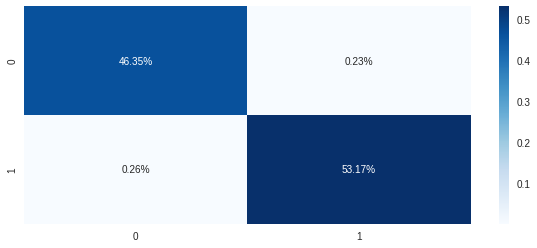

In [86]:
show_result(X_train_bin, y_train_bin, knn, model_path)


## Result is good but still have 0.23%  of false negetive and 0.26% of true positive in test data

In [ ]:
show_result(X_train_bin, y_train_bin, svm, model_path)

# Multi Class Classification using knn 

In [ ]:
show_result(std_data, label, knn, model_path)

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Here model learns the data in perfect manner and good hyperparameter tunnining is obtain by running differet parameters
--
The accuracy is too good but we need to focus on pricision and recall value because data is highly imbalanced 

In [102]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [137]:
str(model)[0:10]

'LogisticRe'

# Binary Classification normal or abnormal conditions is checked using logistic Regression

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
0,0.879267,0.860445,0.869754,14668.000000
1,0.880572,0.897005,0.888712,16826.000000
accuracy,0.879977,0.879977,0.879977,0.879977
macro avg,0.879919,0.878725,0.879233,31494.000000
weighted avg,0.879964,0.879977,0.879883,31494.000000


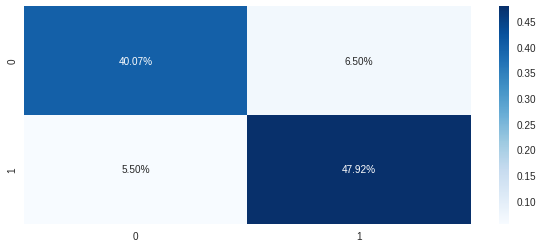

In [103]:
show_result(X_train_bin, y_train_bin, model, model_path)

# Multi class Classification normal or abnormal conditions is checked using SVM


/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,precision,recall,f1-score,support
0,0.987579,0.996145,0.991844,11414.000000
1,0.916905,0.862824,0.889043,2967.000000
2,0.778571,0.801471,0.789855,272.000000
3,0.750000,0.400000,0.521739,15.000000
4,0.970653,0.974979,0.972811,16826.000000
accuracy,0.970312,0.970312,0.970312,0.970312
macro avg,0.880742,0.807084,0.833058,31494.000000
weighted avg,0.969960,0.970312,0.970022,31494.000000


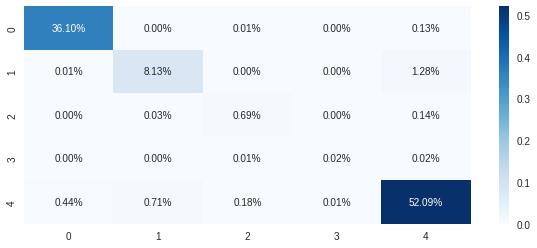

In [104]:
show_result(std_data, label, svm, model_path)

In [106]:
#Using Support vector machine we obtain the multi class classification and result is satisfactory

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.987980,0.993780,0.990871,11414.00000
1,0.886153,0.836872,0.860808,2967.00000
2,0.701961,0.658088,0.679317,272.00000
3,0.666667,0.400000,0.500000,15.00000
4,0.963946,0.970878,0.967400,16826.00000
accuracy,0.963580,0.963580,0.963580,0.96358
macro avg,0.841341,0.771924,0.799679,31494.00000
weighted avg,0.962924,0.963580,0.963154,31494.00000


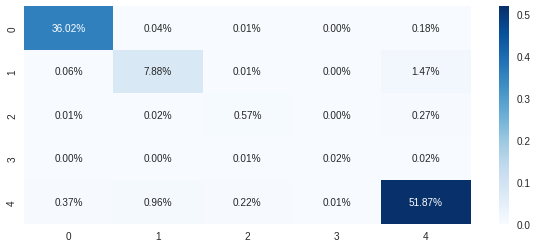

In [142]:
show_result(std_data, label, model, model_path)

# Multi class Classification normal or abnormal conditions is checked using logistic Regression
----
The result obtain is 96% accurate and can be used for classification in real problem under contant supervision 